**LIBRARIES AND SETTINGS**

In [61]:
# LIBRARIES
import os
import re
import time
import requests
import json
import folium
import fnmatch
import numpy as np
import pandas as pd
from pandas import json_normalize
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# IGNORE WARNINGS
import warnings
warnings.filterwarnings("ignore")

# GET CURRENT WORKING DIRECTORY
print(os.getcwd())


/workspaces/data_analytics_project


---

**DATA IMPORT**

In [62]:
# SHOW .CSV - FILES IN THE DIRECTORY
flist = fnmatch.filter(os.listdir('.'), '*.csv')
for i in flist:
    print(i)

# READ THE DATA TO A PANDAS DATA FRAME
df = pd.read_csv('IMDB Top 250 Movies.csv', sep=';', encoding='utf-8')
df.head()

IMDB Top 250 Movies.csv


,title,genres,release_year,runtime_(mins),age_rating,director,movie_rating,votes_count
0,The Shawshank Redemption,Drama,1994,142,12,Frank Darabont,"9,3",2969404
1,The Godfather,"Crime, Drama",1972,175,16,Francis Ford Coppola,"9,2",2070969
2,The Godfather Part II,"Crime, Drama",1974,202,16,Francis Ford Coppola,"9,0",1398083
3,The Dark Knight,"Action, Crime, Drama, Thriller",2008,152,16,Christopher Nolan,"9,0",2950798
4,12 Angry Men,"Crime, Drama",1957,96,12,Sidney Lumet,"9,0",895706


**COUNT / DATA TYPE**

In [63]:
# DIMENSION (ROWS, COLUMNS)
print('Dimension:', df.shape)
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])

# GET DATA TYPES
df.dtypes

Dimension: (250, 8)
Number of rows: 250
Number of columns: 8


title             object
genres            object
release_year       int64
runtime_(mins)     int64
age_rating        object
director          object
movie_rating      object
votes_count        int64
dtype: object

**COUNT / IDENTIFY MISSING VALUES (IF ANY)**

In [64]:
# COUNT MISSING VALUES
print(pd.isna(df).sum())

# IDENTIFY ROWS WITH MISSING VALUES
df[df.isna().any(axis=1)].head()

title             0
genres            0
release_year      0
runtime_(mins)    0
age_rating        0
director          0
movie_rating      0
votes_count       0
dtype: int64


,title,genres,release_year,runtime_(mins),age_rating,director,movie_rating,votes_count


**COUNT / IDENTIFY DUPLICATED VALUES (IF ANY)**

In [65]:
# COUNT DUPLICATED VALUES
print(df.duplicated().sum())

# IDENTIFY ROWS WITH DUPLICATED VALUES
df[df[['title', 'genres', 'release_year']].duplicated()]

0


,title,genres,release_year,runtime_(mins),age_rating,director,movie_rating,votes_count


**DROP ROWS WITH MISSING VALUES**

In [66]:
# DROP MISSING VALUES
print(df.shape)
df = df.dropna()

# DROP DUPLICATED VALUES
print(df.shape)

(250, 8)
(250, 8)


**CREATE NEW VARIABLE (CATEGORIAL)**

In [67]:
# DEFINE LABLES
labels = ['1900 - 1949', '1950 - 1999', '2000 - 2050']
labels_price = ['1900s', '1910s', '1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s']

# CREATE CATEGORIES 
df["year_cat1"] = pd.cut(df['release_year'], bins=[1900, 1950, 2000, 2050], labels=labels)
df["year_cat2"] = pd.cut(df['release_year'], bins=[1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020],labels=labels_price)

# SHOW CATEGORIES
df[['release_year', 'year_cat1', 'year_cat2']].head(10)

,release_year,year_cat1,year_cat2
0,1994,1950 - 1999,1990s
1,1972,1950 - 1999,1970s
2,1974,1950 - 1999,1970s
3,2008,2000 - 2050,2000s
4,1957,1950 - 1999,1950s
5,1993,1950 - 1999,1990s
6,2003,2000 - 2050,2000s
7,1994,1950 - 1999,1990s
8,2001,2000 - 2050,2000s
9,1999,1950 - 1999,1990s


<U>**EXPLORATORY DATA ANALYSIS (EDA): RICH NON-GRAPHICAL**</U>

***SUMMARY STATISTICS OF NUMERIC VARIABLES***

In [68]:
df.describe().round(2)

,release_year,runtime_(mins),votes_count
count,250.00,250.00,250.00
mean,1985.01,128.87,709757.84
std,24.77,30.91,586931.42
min,1921.00,45.00,33534.00
25%,1967.25,107.00,236900.25
50%,1992.00,126.00,588805.00
75%,2004.75,143.75,1088985.25
max,2019.00,238.00,2969404.00


***QUANTILES VALUES***

In [69]:
df[['release_year', 'runtime_(mins)']].quantile(q=[0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95]).round(2)

,release_year,runtime_(mins)
0.05,1940.00,88.00
0.10,1948.00,93.90
0.25,1967.25,107.00
0.50,1992.00,126.00
0.75,2004.75,143.75
0.90,2014.00,175.20
0.95,2016.55,184.10


***DIRECTORS WITH THE MOST MOVIES***

In [70]:
df['director'].value_counts().head(10) 

director
Martin Scorsese      8
Alfred Hitchcock     7
Stanley Kubrick      7
Christopher Nolan    7
Steven Spielberg     7
Billy Wilder         6
Quentin Tarantino    6
Charles Chaplin      5
Ridley Scott         4
Roman Polanski       3
Name: count, dtype: int64

<U>**EXPLORATORY DATA ANALYSIS (EDA): RICH GRAPHICAL**</U>

***HISTOGRAM (DISTRIBUTION OF MOVIE RELEASES PER DIRECTOR)***

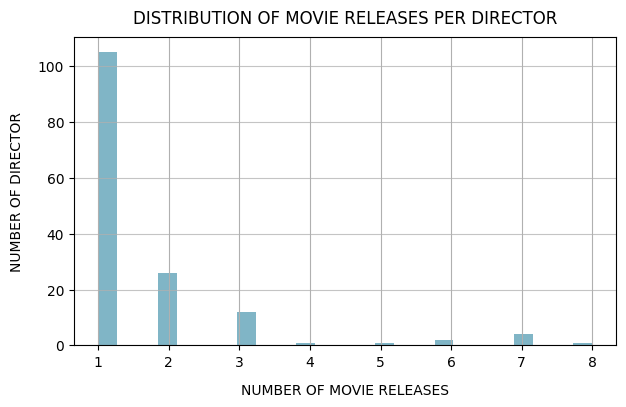

In [71]:

# PLOT HISTOGRAM
fig = plt.figure( figsize=(7,4))

plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)

n, bins, patches = plt.hist(x=df['director'].value_counts(), 
                            bins=25, 
                            color='#026c8e',
                            alpha=0.5, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# SET LABELS
plt.title('DISTRIBUTION OF MOVIE RELEASES PER DIRECTOR', fontsize=12, pad=10)
plt.xlabel('NUMBER OF MOVIE RELEASES', fontsize=10, labelpad=10)
plt.ylabel('NUMBER OF DIRECTOR', fontsize=10, labelpad=10)

# SET FONT SIZE OF LABELS
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

***HISTOGRAM (DISTRIBUTION OF MOVIES BY RELEASE YEAR)***

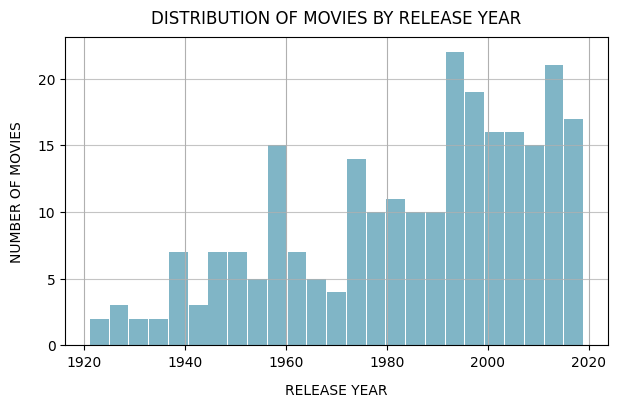

In [72]:

# PLOT HISTOGRAM
fig = plt.figure( figsize=(7,4))

plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)

n, bins, patches = plt.hist(x=df['release_year'], 
                            bins=25, 
                            color='#026c8e',
                            alpha=0.5, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# SET LABELS
plt.title('DISTRIBUTION OF MOVIES BY RELEASE YEAR', fontsize=12, pad=10)
plt.xlabel('RELEASE YEAR', fontsize=10, labelpad=10)
plt.ylabel('NUMBER OF MOVIES', fontsize=10, labelpad=10)

# SET FONT SIZE OF LABELS
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()